In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, skew, boxcox_normmax
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading csv as a dataframe
data = pd.read_csv('marketing_customer_analysis.csv')
data

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [4]:
data.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [5]:
data = data.drop(['Unnamed: 0'], axis=1)

In [6]:
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [7]:
# shape of the dataframe
data.shape

(10910, 25)

In [8]:
# Standardization of header names
def standardization(df):
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ','_')

In [9]:
standardization(data)
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [10]:
#Check and deal with NaN values.
def nulls_data(df):
    nulls_df = pd.DataFrame(round(df.isna().sum()/len(df)*100,2))
    nulls_df = nulls_df.reset_index()
    nulls_df.columns = ['header_name', '%_null_values'] 
    return nulls_df

In [11]:
res_null=nulls_data(data)
res_null

,header_name,%_null_values
0,customer,0.00
1,state,5.78
2,customer_lifetime_value,0.00
3,response,5.78
4,coverage,0.00
5,education,0.00
6,effective_to_date,0.00
7,employmentstatus,0.00
8,gender,0.00
9,income,0.00


In [12]:
columns_drop = res_null[res_null['%_null_values']>5]['header_name']
columns_drop

1                         state
3                      response
13      months_since_last_claim
15    number_of_open_complaints
22                vehicle_class
23                 vehicle_size
24                 vehicle_type
Name: header_name, dtype: object

In [13]:
# The column 'vehicle_type' is dropped because of the high percentage of missing data
data = data.drop(['vehicle_type'],axis=1)
# The numerical columns with the percentage of missing data higher than 5 are dropped
data = data.drop(['months_since_last_claim', 'number_of_open_complaints'],axis=1)

In [14]:
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_policy_inception,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,52,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,26,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,31,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,3,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,31,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,40,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,68,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,63,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,27,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [15]:
# Fixing NAN values which are categorical and replacing them with 'None'
def null_cat_fix(df):
    cat_cols= df.select_dtypes(include=['object']).columns.tolist()
    for col in cat_cols:
        df[col] = df[col].fillna('None')
    return df    
    

In [16]:
null_cat_fix(data)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_policy_inception,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,52,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,26,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,31,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,3,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,31,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,40,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,68,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,63,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,27,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [17]:
nulls_data(data)

,header_name,%_null_values
0,customer,0.0
1,state,0.0
2,customer_lifetime_value,0.0
3,response,0.0
4,coverage,0.0
5,education,0.0
6,effective_to_date,0.0
7,employmentstatus,0.0
8,gender,0.0
9,income,0.0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10910 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10910 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

In [19]:
#Describe DataFrame.
summary = data.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly_premium_auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_policy_inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678


In [20]:
len(data.total_claim_amount.unique())

5106

In [21]:
data['total_claim_amount']

0         292.800000
1         744.924331
2         480.000000
3         484.013411
4         707.925645
            ...     
10905    1214.400000
10906     273.018929
10907     381.306996
10908     618.288849
10909    1021.719397
Name: total_claim_amount, Length: 10910, dtype: float64

Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively). 

In [22]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(exclude=['object']).columns.tolist()
numerical = data.drop(categorical_columns, axis=1)
numerical


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,number_of_policies,total_claim_amount
0,4809.216960,48029,61,52,9,292.800000
1,2228.525238,0,64,26,1,744.924331
2,14947.917300,22139,100,31,2,480.000000
3,22332.439460,49078,97,3,2,484.013411
4,9025.067525,23675,117,31,7,707.925645
...,...,...,...,...,...,...
10905,15563.369440,0,253,40,7,1214.400000
10906,5259.444853,61146,65,68,6,273.018929
10907,23893.304100,39837,201,63,2,381.306996
10908,11971.977650,64195,158,27,6,618.288849


In [23]:
numerical_columns

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_policy_inception',
 'number_of_policies',
 'total_claim_amount']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027F48277E80>,
      dtype=object)

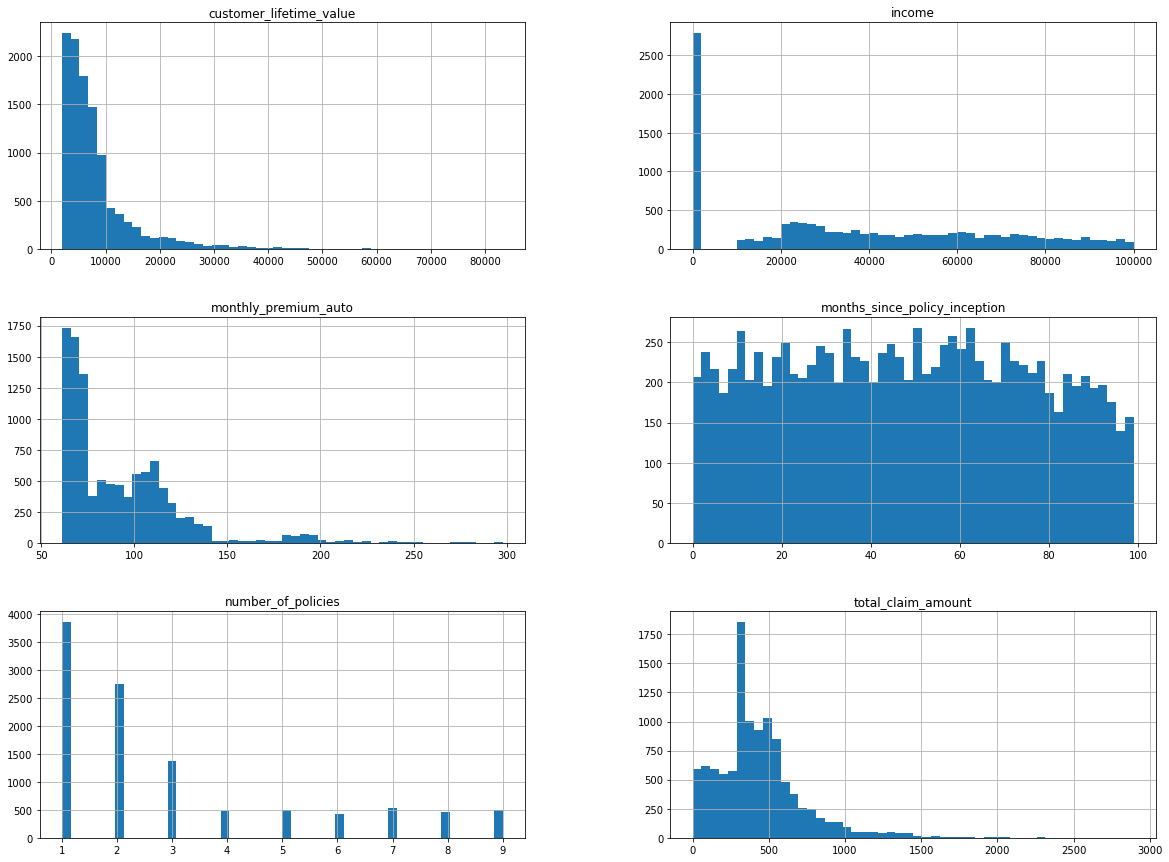

In [24]:
#Use Matplotlib to construct histograms
numerical.hist(bins=50, figsize=(20,15))

checking multocolinearity and correlation between variables

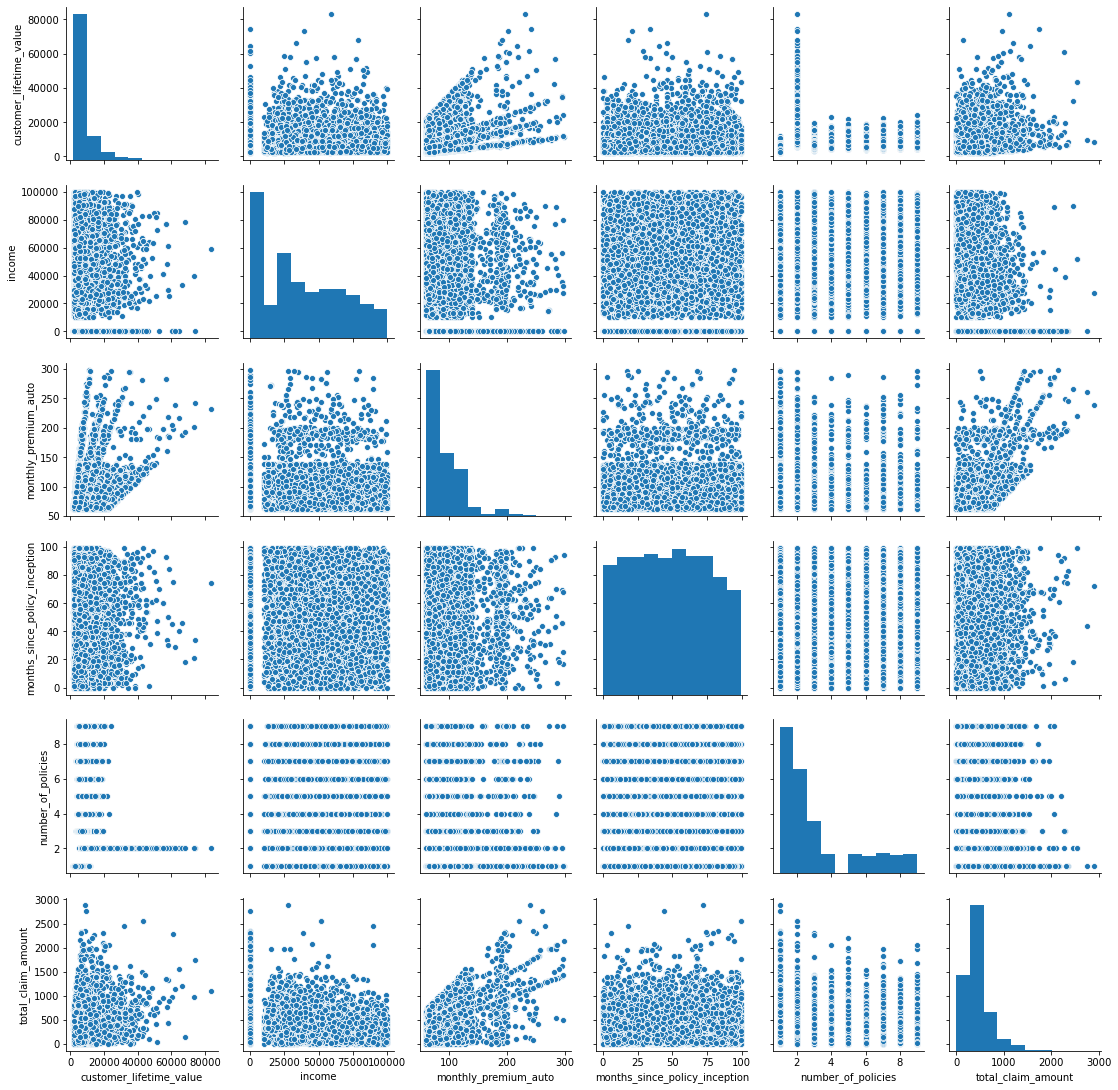

In [25]:
sns.pairplot(numerical)

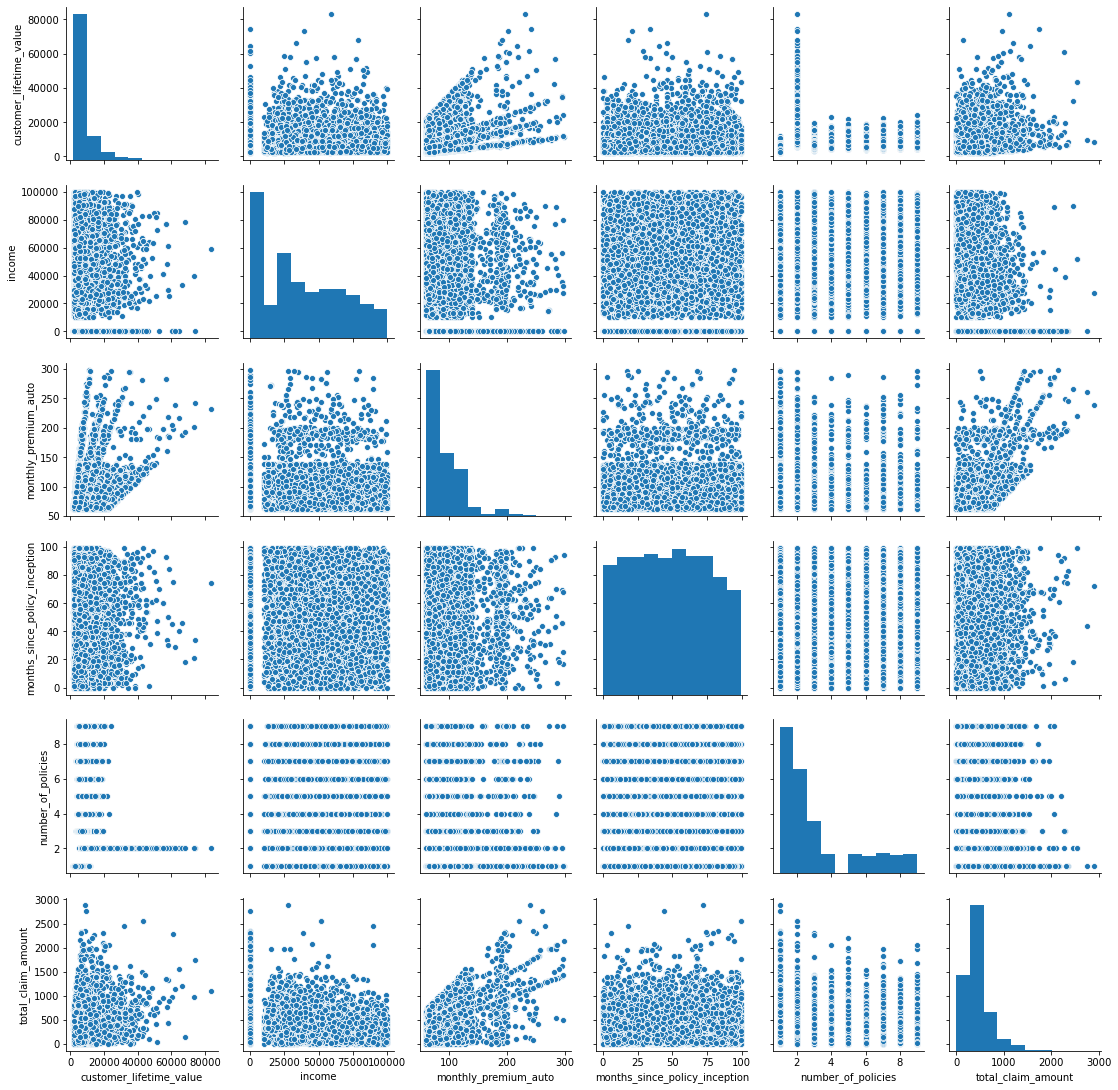

In [26]:
sns.pairplot(data)

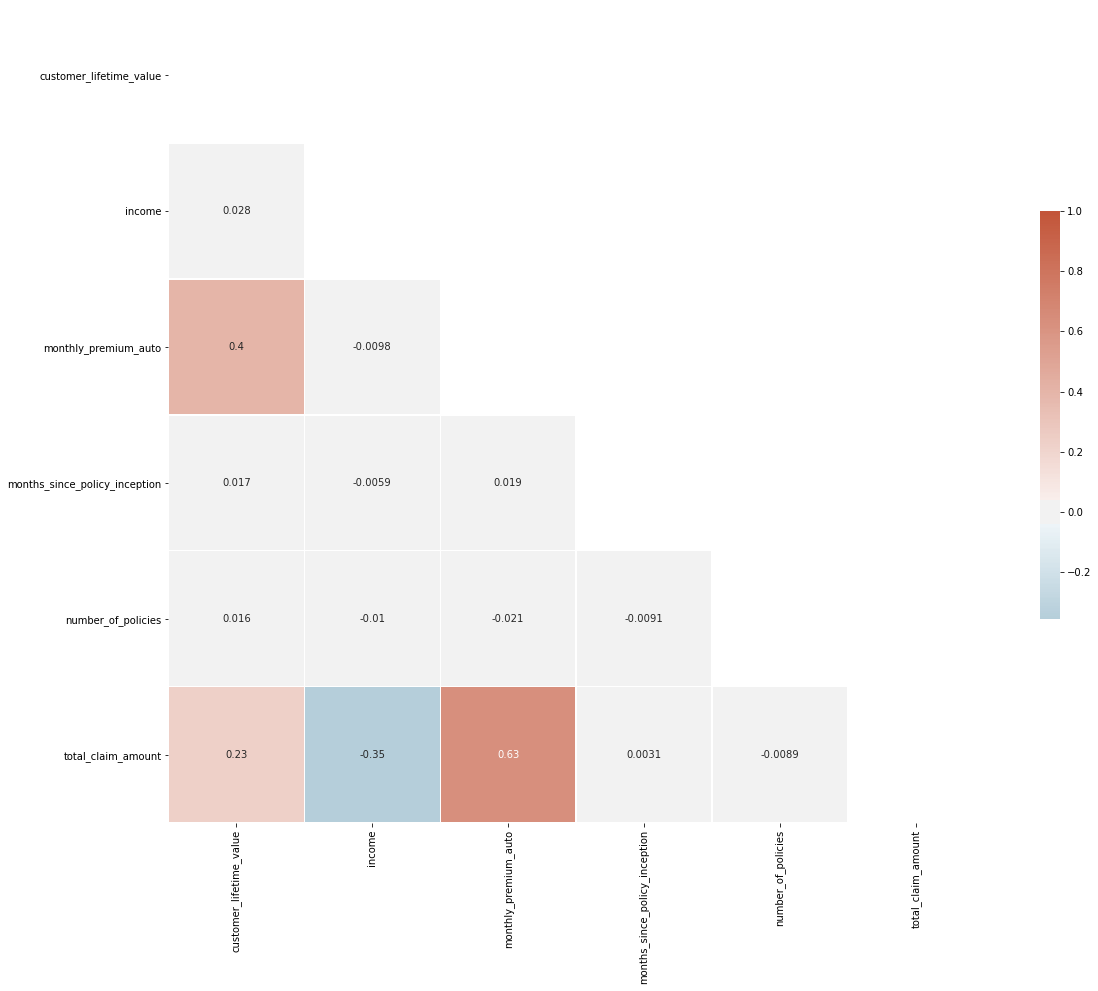

In [27]:
#For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
# correlation between different variables
f, ax = plt.subplots(figsize=(20, 15))
mat = numerical.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [28]:
# Another way to check correlation-VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_variables = numerical.drop(['total_claim_amount'],axis=1)

In [29]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]
vif_data

,feature,VIF
0,customer_lifetime_value,2.819270
1,income,2.243612
2,monthly_premium_auto,5.698837
3,months_since_policy_inception,3.184200
4,number_of_policies,2.236750


In [30]:
# These VIF values should be checked to be less than max of 10 and 1/1-R²model

In [31]:
x_num=numerical
Y=data['total_claim_amount']
x_num1=numerical.drop(['total_claim_amount'],axis=1)



In [32]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols
X = sm.add_constant(x_num1)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     2367.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:22:41   Log-Likelihood:                -73411.
No. Observations:               10910   AIC:                         1.468e+05
Df Residuals:                   10904   BIC:                         1.469e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [33]:
max(10,1.37)

10

In [34]:
# so, all the numerical features have VIF less than max of 10 and 1/1-R²model

Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [35]:
#No high correlation was observed between pair of features, so none of them was dropped. monthly_premium_auto has the highest correlation with the target.

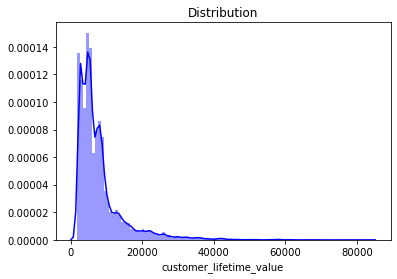

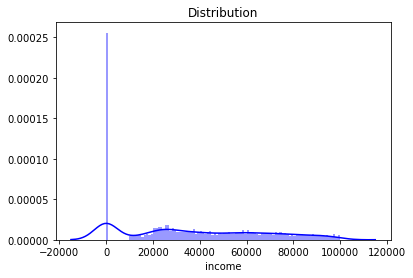

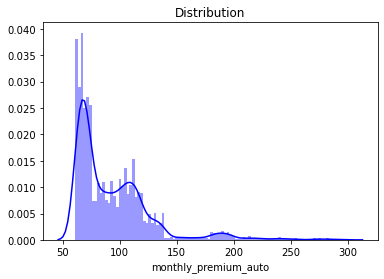

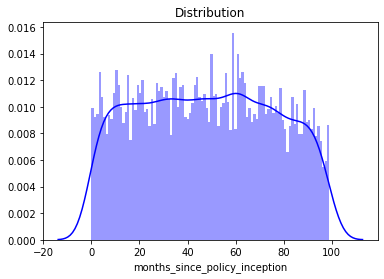

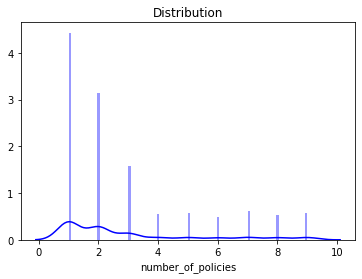

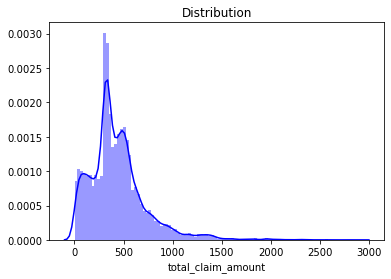

In [36]:
#Now we will try to check the normality of the numerical variables visually
#Use seaborn library to construct distribution plots for the numerical variables
for col in numerical_columns:
    sns.distplot(numerical[col],bins= 100, 
                   color = 'blue')
    plt.title('Distribution')
    plt.show()

In [37]:
## Do the distributions for different numerical variables look like a normal distribution
#Answer: no, it does not, and they are skewed.

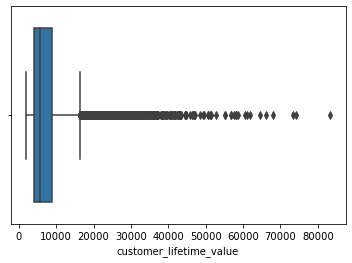

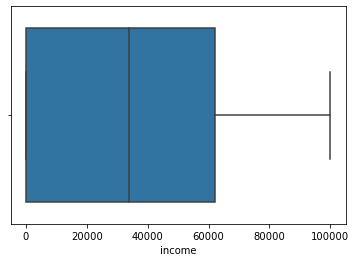

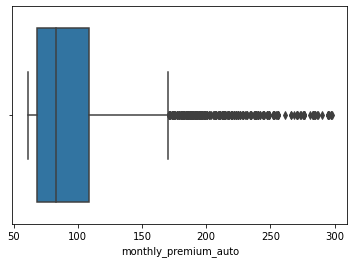

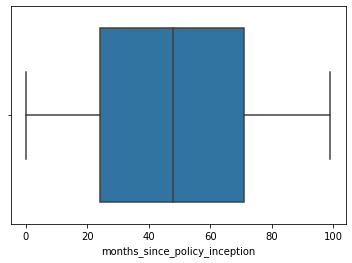

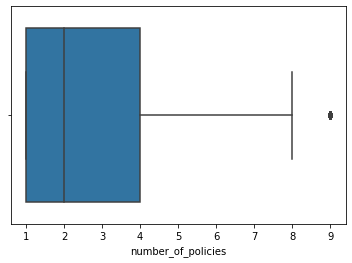

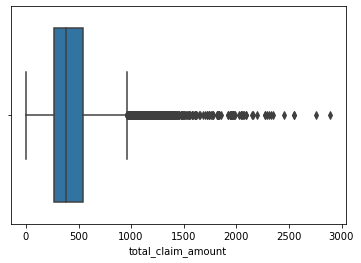

In [38]:
# checking for outliers
for col in numerical_columns:
    sns.boxplot(numerical[col])
    plt.show()

In [39]:
# From features a few columns have outliers which should be corrected
# column customer_lifetime_value-removing outliers
x_num['customer_lifetime_value'].unique()

array([ 4809.21696 ,  2228.525238, 14947.9173  , ...,  5259.444853,
       23893.3041  , 11971.97765 ])

In [40]:
iqr=np.percentile(x_num['customer_lifetime_value'],75)-np.percentile(x_num['customer_lifetime_value'],25)
upper_limit=np.percentile(x_num['customer_lifetime_value'],75) +1.5*iqr
lower_limit=np.percentile(x_num['customer_lifetime_value'],75) -1.5*iqr
upper_limit, lower_limit

(16460.268173000004, 1525.2901010000005)

In [41]:
data = data[(x_num['customer_lifetime_value']>lower_limit)&(x_num['customer_lifetime_value']<upper_limit)]
data = data.reset_index()
data=data.drop(['index'], axis=1)

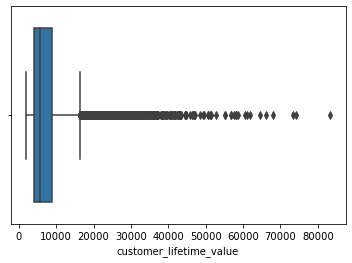

In [42]:
sns.boxplot(x_num['customer_lifetime_value'])

In [43]:
# monthly_premium_auto-removing outliers
x_num['monthly_premium_auto'].unique()

array([ 61,  64, 100,  97, 117,  63, 154,  85, 127,  62,  99,  69, 116,
       114,  66,  73,  94, 104, 189,  74, 121, 110, 111,  72, 115, 159,
       101,  65,  82,  71, 126,  68, 199,  96,  67, 125, 249, 105,  92,
        78,  77,  79, 223, 242,  70, 102, 109, 107, 119, 194, 113, 106,
       247,  80,  86,  81,  83, 122, 253, 196, 132, 139,  84, 130,  93,
       103, 112, 222, 118,  88, 182, 283,  90, 128,  89, 235, 190,  76,
        87, 133, 153, 129,  98, 148, 123,  91, 211, 131, 108, 187, 214,
       181, 173, 252,  95, 124, 137, 145, 188, 143, 198, 138, 245, 195,
       186, 170, 136, 161, 157, 141, 205, 271, 192, 142, 140, 134, 240,
       185, 244, 210, 184, 202, 296, 213, 273, 219, 135, 169, 155, 225,
       266, 215, 197, 256, 212, 158, 180, 166, 168, 183, 162, 191, 179,
       150, 146, 276, 165, 239, 237, 193, 229, 274, 207, 295, 208, 172,
       217, 206, 201, 171, 152, 156, 174, 238, 167, 151, 144, 163, 287,
       209, 290, 220, 228, 232, 178, 177, 275, 176, 281, 149, 29

In [44]:
iqr1=np.percentile(x_num['monthly_premium_auto'],75)-np.percentile(x_num['monthly_premium_auto'],25)
upper_limit1=np.percentile(x_num['monthly_premium_auto'],75) +1.5*iqr1
lower_limit1=np.percentile(x_num['monthly_premium_auto'],75) -1.5*iqr1
upper_limit1, lower_limit1

(170.5, 47.5)

In [45]:
data = data[(x_num['monthly_premium_auto']>lower_limit1)&(x_num['monthly_premium_auto']<upper_limit1)]
data = data.reset_index()
data=data.drop(['index'], axis=1)
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_policy_inception,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,52,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,26,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,31,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,31,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
4,HO81102,None,4745.181764,None,Basic,High School or Below,2/14/11,Employed,M,50549,Suburban,Divorced,61,73,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9455,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,Suburban,Married,74,82,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize
9456,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,40,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
9457,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,68,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
9458,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,27,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


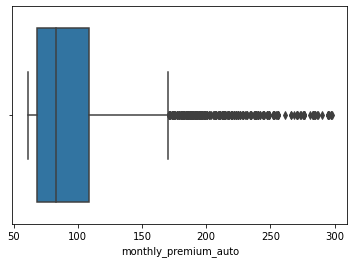

In [46]:
sns.boxplot(x_num['monthly_premium_auto'])

In [47]:
#number_of_policies and months_since_policy_inception could be removed because of their weak correlation with the target
x_num=x_num.drop(['number_of_policies', 'months_since_policy_inception'], axis=1)


In [48]:
data=data.drop(['number_of_policies', 'months_since_policy_inception'], axis=1)
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
4,HO81102,None,4745.181764,None,Basic,High School or Below,2/14/11,Employed,M,50549,Suburban,Divorced,61,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9455,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,Suburban,Married,74,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize
9456,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
9457,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
9458,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [49]:
# splitting numerical features from the categorical ones
numerical_columns = data.select_dtypes(exclude=['object']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical = data.drop(categorical_columns, axis=1)


In [50]:
# Checking skewness of the numerical features
skewed_features = numerical.apply(lambda x:stats.skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew value' :skewed_features})
skewness.head(20)

,Skew value
monthly_premium_auto,2.043638
total_claim_amount,1.610481
customer_lifetime_value,0.966447
income,0.290882


In [51]:
# Fixing skewness of numerical features using log_transformation
skewed_features = numerical.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_features})
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index
    
for i in skew_index:
    numerical[i] = np.log1p(numerical[i])
numerical

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,8.478497,48029,4.127134,5.682899
1,7.709544,0,4.174387,6.614624
2,9.612394,22139,4.615121,6.175867
3,9.107872,23675,4.770685,6.563751
4,8.465096,50549,4.127134,5.682899
...,...,...,...,...
9455,7.927564,59855,4.317488,5.875492
9456,9.652740,0,5.537334,7.102829
9457,8.567971,61146,4.189655,5.613197
9458,9.390408,64195,5.068904,6.428572


In [53]:
# Standardization of the data and first the target value will be removed
numerical_features = numerical.drop(['total_claim_amount'],axis=1)
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numerical_features)
x_standard = transformer.transform(numerical_features)
print(x_standard)

[[-0.26857879  0.34833285 -1.21040228]
 [-1.77028851 -1.23217495 -1.04626092]
 [ 1.94583811 -0.50363881  0.48470496]
 ...
 [-0.0938438   0.77997874 -0.99322662]
 [ 1.51231454  0.8803133   2.06100389]
 [ 0.42422087 -1.23217495  0.51892868]]


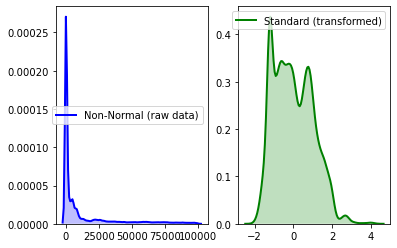

In [54]:
# checking the distribution
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(x_num, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal (raw data)", color ="blue", ax = ax[0])
  
sns.distplot(x_standard, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Standard (transformed)", color ="green", ax = ax[1])

In [55]:
cols=['customer_lifetime_value','income','monthly_premium_auto']
#converting the array to dataFrame
x_standard=pd.DataFrame(x_standard,columns=cols)
x_standard

,customer_lifetime_value,income,monthly_premium_auto
0,-0.268579,0.348333,-1.210402
1,-1.770289,-1.232175,-1.046261
2,1.945838,-0.503639,0.484705
3,0.960544,-0.453093,1.025085
4,-0.294751,0.431259,-1.210402
...,...,...,...
9455,-1.344512,0.737495,-0.549175
9456,2.024630,-1.232175,3.688180
9457,-0.093844,0.779979,-0.993227
9458,1.512315,0.880313,2.061004


In [56]:
# categorical variables
numerical_columns = data.select_dtypes(exclude=['object']).columns.tolist()
categorical = data.drop(numerical_columns, axis=1)


In [57]:
categorical

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
4,HO81102,None,None,Basic,High School or Below,2/14/11,Employed,M,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9455,SU71163,Arizona,No,Basic,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
9456,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
9457,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
9458,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


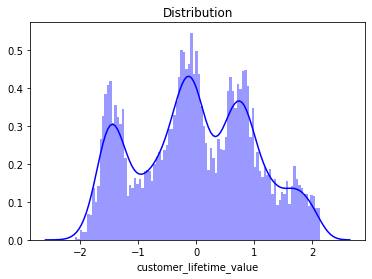

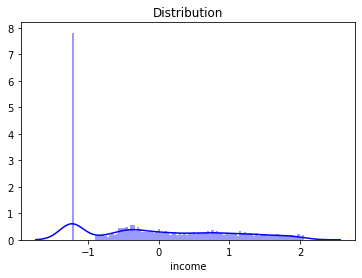

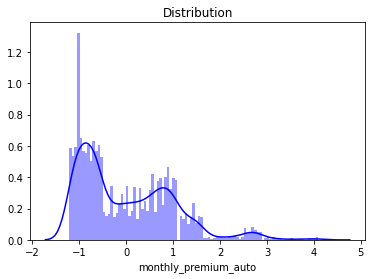

In [58]:
# checking distributions of the different numerical variable after standardization
for col in cols:
    sns.distplot(x_standard[col],bins= 100, 
                   color = 'blue')
    plt.title('Distribution')
    plt.show()

In [59]:
categorical['gender'].unique()

array(['M', 'F'], dtype=object)

In [60]:
categorical['gender']

0       M
1       F
2       M
3       F
4       M
       ..
9455    M
9456    F
9457    F
9458    F
9459    M
Name: gender, Length: 9460, dtype: object

In [61]:
# Checking and cleaning categorical data

categorical['gender'] = categorical['gender'].replace({'M':'male', 'F':'female'})
categorical['gender']

0         male
1       female
2         male
3       female
4         male
         ...  
9455      male
9456    female
9457    female
9458    female
9459      male
Name: gender, Length: 9460, dtype: object

In [62]:
categorical

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,male,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,female,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,male,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,female,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
4,HO81102,None,None,Basic,High School or Below,2/14/11,Employed,male,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9455,SU71163,Arizona,No,Basic,College,1/7/11,Employed,male,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
9456,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,female,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
9457,KX53892,Oregon,No,Basic,College,1/6/11,Employed,female,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
9458,WA60547,California,No,Premium,College,2/13/11,Employed,female,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [63]:
categorical['coverage'].unique()

array(['Basic', 'Premium', 'Extended'], dtype=object)

In [64]:
categorical['education'].unique()

array(['College', 'Bachelor', 'High School or Below', 'Doctor', 'Master'],
      dtype=object)

In [65]:
# # For columns 'coverage' and 'education' LabelEncoder could be used because they are ordinal data

from sklearn import preprocessing 
label1 = preprocessing.LabelEncoder()
categorical['education'] = label1.fit_transform(categorical['education'])
categorical['education']



0       1
1       1
2       0
3       0
4       3
       ..
9455    1
9456    0
9457    1
9458    1
9459    0
Name: education, Length: 9460, dtype: int32

In [66]:
categorical['education'] = categorical['education'].replace({0:2, 1:1, 2:4, 3:0, 4:3})
categorical['education']

0       1
1       1
2       2
3       2
4       0
       ..
9455    1
9456    2
9457    1
9458    1
9459    2
Name: education, Length: 9460, dtype: int64

In [67]:
label2 = preprocessing.LabelEncoder()
categorical['coverage'] = label2.fit_transform(categorical['coverage'])
categorical['coverage']

0       0
1       0
2       0
3       2
4       0
       ..
9455    0
9456    2
9457    0
9458    2
9459    0
Name: coverage, Length: 9460, dtype: int32

In [68]:
categorical

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,0,1,2/18/11,Employed,male,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,0,1,1/18/11,Unemployed,female,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,0,2,2/10/11,Employed,male,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,QA50777,Oregon,No,2,2,1/17/11,Medical Leave,female,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
4,HO81102,None,None,0,0,2/14/11,Employed,male,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9455,SU71163,Arizona,No,0,1,1/7/11,Employed,male,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
9456,FE99816,Nevada,No,2,2,1/19/11,Unemployed,female,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
9457,KX53892,Oregon,No,0,1,1/6/11,Employed,female,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
9458,WA60547,California,No,2,1,2/13/11,Employed,female,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [69]:
categorical_features = categorical
categorical_features['total_claim_amount']= numerical['total_claim_amount']
categorical_features

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,total_claim_amount
0,DK49336,Arizona,No,0,1,2/18/11,Employed,male,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,5.682899
1,KX64629,California,No,0,1,1/18/11,Unemployed,female,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,6.614624
2,LZ68649,Washington,No,0,2,2/10/11,Employed,male,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,6.175867
3,QA50777,Oregon,No,2,2,1/17/11,Medical Leave,female,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,6.563751
4,HO81102,None,None,0,0,2/14/11,Employed,male,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize,5.682899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9455,SU71163,Arizona,No,0,1,1/7/11,Employed,male,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,5.875492
9456,FE99816,Nevada,No,2,2,1/19/11,Unemployed,female,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,7.102829
9457,KX53892,Oregon,No,0,1,1/6/11,Employed,female,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,5.613197
9458,WA60547,California,No,2,1,2/13/11,Employed,female,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,6.428572


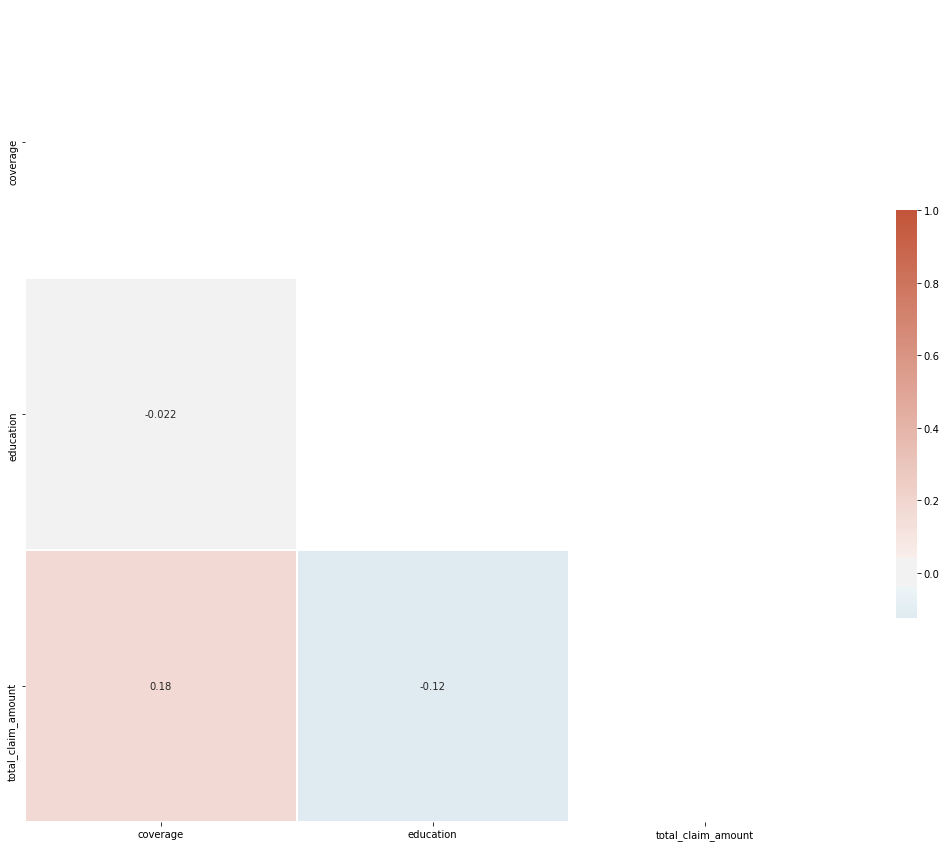

In [70]:
# correlation between different categorical variables
f, ax = plt.subplots(figsize=(20, 15))
mat = categorical_features.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

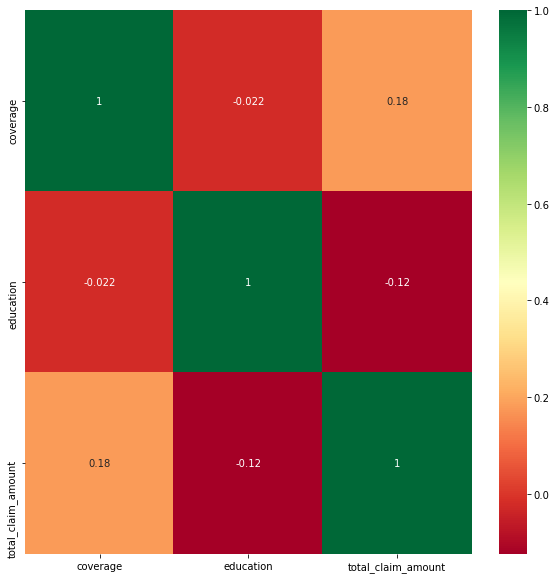

In [71]:
# Categorical Features with correlation higher than 0.1
corr=categorical_features.corr()
high_corr_features = corr.index[abs(corr['total_claim_amount'])>0.1]
plt.figure(figsize=(10,10))
sns.heatmap(categorical_features[high_corr_features].corr(), annot=True,cmap="RdYlGn")
plt.show()

In [72]:
# Most of the categorical features have a weak correlation with target (total_claim_amount')
categorical=categorical.drop(['customer','effective_to_date'], axis = 1)
categorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,total_claim_amount
0,Arizona,No,0,1,Employed,male,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,5.682899
1,California,No,0,1,Unemployed,female,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,6.614624
2,Washington,No,0,2,Employed,male,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,6.175867
3,Oregon,No,2,2,Medical Leave,female,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,6.563751
4,None,None,0,0,Employed,male,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize,5.682899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9455,Arizona,No,0,1,Employed,male,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,5.875492
9456,Nevada,No,2,2,Unemployed,female,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,7.102829
9457,Oregon,No,0,1,Employed,female,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,5.613197
9458,California,No,2,1,Employed,female,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,6.428572


In [73]:
# Concatanating numerical and categorical variable to have a single dataframe
x= pd.concat([x_standard, categorical],axis= 1)
x

,customer_lifetime_value,income,monthly_premium_auto,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,total_claim_amount
0,-0.268579,0.348333,-1.210402,Arizona,No,0,1,Employed,male,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,5.682899
1,-1.770289,-1.232175,-1.046261,California,No,0,1,Unemployed,female,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,6.614624
2,1.945838,-0.503639,0.484705,Washington,No,0,2,Employed,male,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,6.175867
3,0.960544,-0.453093,1.025085,Oregon,No,2,2,Medical Leave,female,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,6.563751
4,-0.294751,0.431259,-1.210402,None,None,0,0,Employed,male,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize,5.682899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9455,-1.344512,0.737495,-0.549175,Arizona,No,0,1,Employed,male,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,5.875492
9456,2.024630,-1.232175,3.688180,Nevada,No,2,2,Unemployed,female,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,7.102829
9457,-0.093844,0.779979,-0.993227,Oregon,No,0,1,Employed,female,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,5.613197
9458,1.512315,0.880313,2.061004,California,No,2,1,Employed,female,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,6.428572


In [74]:
# Encoding nominal categorical variables 
x= pd.get_dummies(x,drop_first=True)
x

,customer_lifetime_value,income,monthly_premium_auto,coverage,education,total_claim_amount,state_California,state_Nevada,state_None,state_Oregon,state_Washington,response_None,response_Yes,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_male,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_None,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_None,vehicle_size_Small
0,-0.268579,0.348333,-1.210402,0,1,5.682899,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-1.770289,-1.232175,-1.046261,0,1,6.614624,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,1.945838,-0.503639,0.484705,0,2,6.175867,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
3,0.960544,-0.453093,1.025085,2,2,6.563751,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,-0.294751,0.431259,-1.210402,0,0,5.682899,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9455,-1.344512,0.737495,-0.549175,0,1,5.875492,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0
9456,2.024630,-1.232175,3.688180,2,2,7.102829,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0
9457,-0.093844,0.779979,-0.993227,0,1,5.613197,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
9458,1.512315,0.880313,2.061004,2,1,6.428572,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [75]:
# target
y=x.drop(['total_claim_amount'],axis=1)


In [76]:
# splitting data to training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state=100)

In [85]:
# Applying linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# metrics
# checking different errors
def r2(y, y_pred):
    return r2_score(y, y_pred)
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
    return (rmse)
def mse(y, y_pred):
    return mean_squared_error(y, y_pred) 
def mae(y, y_pred):
    return mean_absolute_error(y, y_pred) 
kf = KFold(n_splits=10, random_state=42, shuffle=True)
# Linear Regression

lreg = LinearRegression()
lreg_model = lreg.fit(x_train, y_train)
y_pred = lreg_model.predict(x_test)
y_pred_train = lreg_model.predict(x_train)


In [86]:
# errors as a dataframe
scores={'R2':[r2(y_test, y_pred),r2(y_train, y_pred_train)],'MSE': [mse(y_test, y_pred),mse(y_train, y_pred_train)],'RMSE':[rmse(y_test, y_pred),rmse(y_train, y_pred_train)],'MAE':[mae(y_test, y_pred),mae(y_train, y_pred_train)]}

final_score = pd.DataFrame(scores, index=['scores of test set', 'scores of training set'])
final_score 

,R2,MSE,RMSE,MAE
scores of test set,1.0,7.618348e-31,8.728315e-16,5.632600e-16
scores of training set,1.0,7.540754e-31,8.683752e-16,5.614287e-16
